#training log analysis

In [1]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import datetime

##Bodyweight
Over the summer of 2014 I started a cut starting from 75kg to 63.3 kg at my powerlifting competition in Sagueney.
I then started a slow bulk/maintainance up to now. 

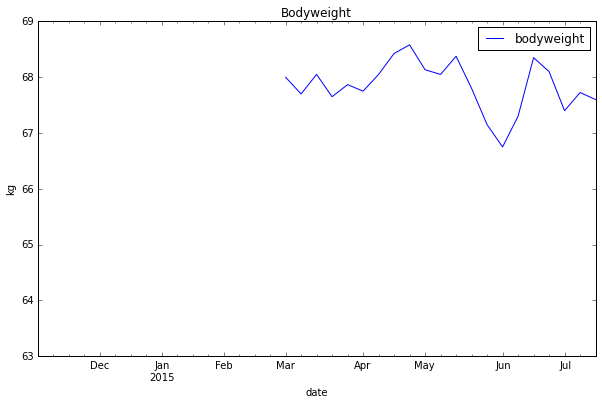

In [2]:
bodyweightData = pd.read_csv('data/bodyweight.csv', parse_dates = ['date'], index_col='date')
bodyweightData = bodyweightData.resample('W')
bodyweightPlot = bodyweightData.plot(figsize =(10,6), title = 'Bodyweight')
bodyweightPlot.set_ylabel('kg')

##Squats
As with a powerlifting meet, let's take a look at squats first. 

In [3]:
squatsData = pd.read_csv('data/allSquats.csv', parse_dates = ['date'], index_col='date')
squatsData.columns

Index(['exercise', 'sets', 'reps', 'weight', 'unit'], dtype='object')

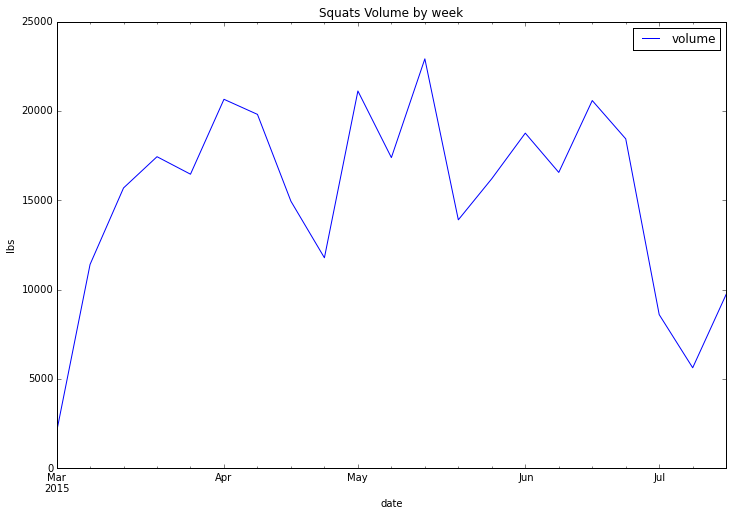

In [4]:
def toVolume(parameters):
    return parameters['sets']*parameters['reps']*parameters['weight']
squatsVolume = squatsData.copy()

squatsVolume['volume'] = squatsData.apply(toVolume, axis='columns')

#filter out competition lifts
squatsVolume = squatsVolume[squatsVolume['unit']!= 'kg']
squatsVolume.drop(['sets','reps','weight', 'unit'], axis=1, inplace=True)

squatsVolumePlot = squatsVolume.resample('W', how = sum).plot(figsize=(12, 8), title = 'Squats Volume by week')
squatsVolumePlot.set_ylabel('lbs')

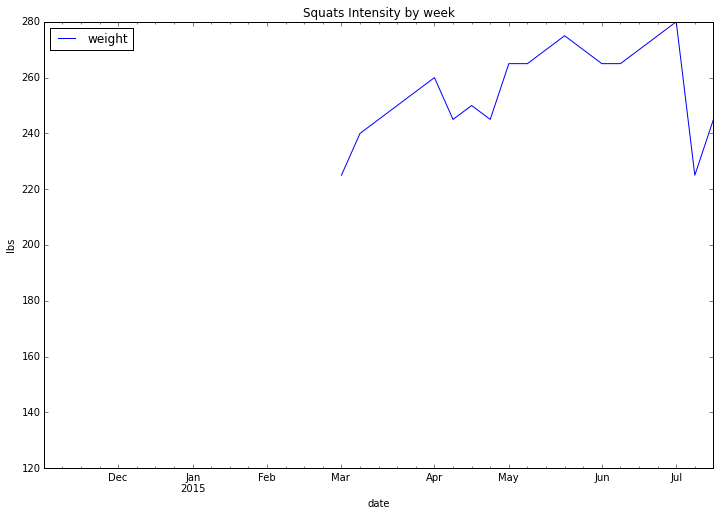

In [5]:
squatsIntensity = squatsData.copy()
squatsIntensity.drop(['sets','reps'], axis=1, inplace=True)

squatsIntensityPlot = squatsIntensity.resample('W', how = np.max).plot(figsize=(12, 8), title = 'Squats Intensity by week')
squatsIntensityPlot.set_ylabel('lbs')

##Bench press
Next let's take a look at bench press. The lift I have had the greatest difficulty improving.

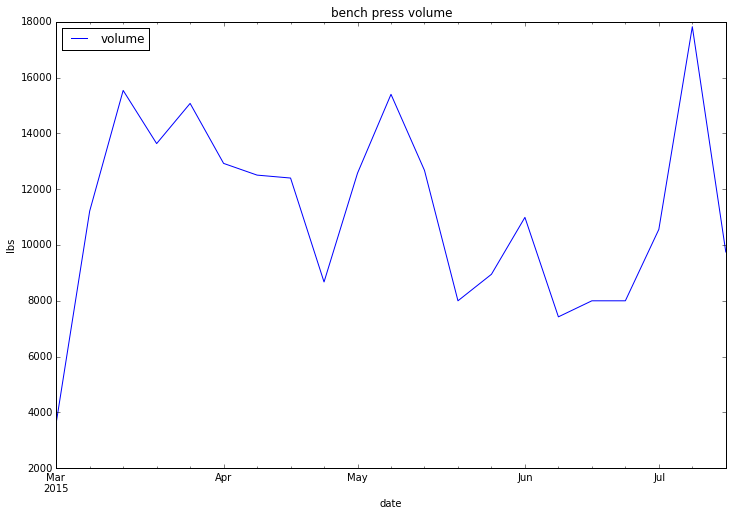

In [6]:
benchData = pd.read_csv('data/bench.csv',parse_dates = ['date'], index_col='date')

benchVolume = benchData.copy()
benchVolume['volume'] = benchData.apply(toVolume, axis='columns')

# filter out competition lifts
benchVolume = benchVolume[benchVolume['unit']!= 'kg']
benchVolume.drop(['sets','reps', 'weight', 'unit', 'exercise'], axis=1, inplace=True)

benchVolumePlot = benchVolume.resample('W', sum).plot(figsize = (12,8), title = 'bench press volume')
benchVolumePlot.set_ylabel('lbs')